In [2]:
from pyod.models.iforest import IsolationForest
import pandas as pd
import numpy as np
from sklearn.metrics import precision_recall_curve, auc
import matplotlib.pyplot as plt

In [3]:
PROJECT_PATH = "D:/ProjectInterPromo/"

In [4]:
def evaluation(score: np.ndarray, y: np.ndarray, display=False):
    precision, recall, thresholds = precision_recall_curve(y, score)
    f1_score = 2 * precision * recall / (precision + recall)
    
    value = auc(recall, precision)
    
    if display:
        plt.plot(recall, precision)
        plt.show()
    
    return value, f1_score, precision, recall

In [5]:
# Lecture du fichier de donnée
data_v0 = pd.read_csv(PROJECT_PATH + "data\sortie\Données_v0\Donnees_V0_NAN_supprimes.csv")

print("Nombre de fraude :", sum(data_v0["TOP_FRAUDE"]))
print("Nombre de données : ", len(data_v0))
print("Ratio : ", sum(data_v0["TOP_FRAUDE"]) / len(data_v0) * 100)

# Suppression des variables qualitative
quali_col = []
count = 0
for i, name in zip(data_v0.dtypes, data_v0.columns):
    if i == "object":
        quali_col.append(name)

data_quanti = data_v0.drop(columns=quali_col + ["Unnamed: 0"])

# 
data_quanti = data_quanti.sample(600000)

print("------------ Sur un echantillion ------------")
print("Nombre de fraude :", sum(data_quanti["TOP_FRAUDE"]))
print("Nombre de données : ", len(data_quanti))
print("Ratio : ", sum(data_quanti["TOP_FRAUDE"]) / len(data_quanti) * 100)

Nombre de fraude : 1479
Nombre de données :  644348
Ratio :  0.22953435100287423
------------ Sur un echantillion ------------
Nombre de fraude : 1377
Nombre de données :  600000
Ratio :  0.2295


In [11]:
model = IsolationForest(contamination=0.01)
model.fit(data_quanti.drop(columns=["TOP_FRAUDE", "TOP_FRAUDE_CARTE", "TOP_FRAUDE_VIREMENT"]).values)
score = model.score_samples(data_quanti.drop(columns=["TOP_FRAUDE", "TOP_FRAUDE_CARTE", "TOP_FRAUDE_VIREMENT"]).values)

C:\Users\Stior\AppData\Local\Temp/ipykernel_660/147864584.py:3: RuntimeWarning: invalid value encountered in true_divide
  f1_score = 2 * precision * recall / (precision + recall)


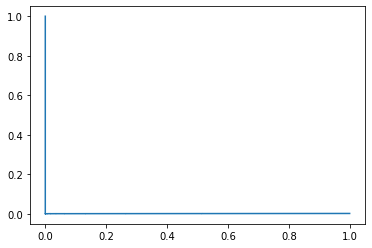

0.0017135659267217688

In [12]:
evaluation(score, data_quanti["TOP_FRAUDE"], display=True)[0]

In [19]:
count = 0
for i, j in zip(list(score > sorted(score)[int(len(score) * (1 - (0.2 / 100)))]), data_quanti["TOP_FRAUDE"]):
    if i == j and i == 1:
        count += 1
print(count)

1


In [23]:
sorted(score)[int(len(score) * (1 - (0.2 / 100)))]

-0.32936362273506214

In [24]:
from pyod.models.knn import KNN

In [ ]:
model = KNN(contamination=0.1, n_neighbors=50)
model.fit(data_quanti.drop(columns=["TOP_FRAUDE", "TOP_FRAUDE_CARTE", "TOP_FRAUDE_VIREMENT"]).values)
score = model.decision_scores_

C:\Users\Stior\AppData\Local\Temp/ipykernel_660/147864584.py:3: RuntimeWarning: invalid value encountered in true_divide
  f1_score = 2 * precision * recall / (precision + recall)


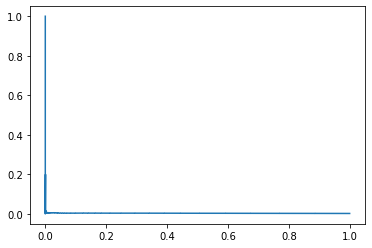

0.0034709437368402657

In [37]:
evaluation(score, data_quanti["TOP_FRAUDE"], display=True)[0]

In [40]:
from pyod.models.mcd import MCD

In [42]:
model = MCD()
model.store_precision = True
model.fit(data_quanti.drop(columns=["TOP_FRAUDE", "TOP_FRAUDE_CARTE", "TOP_FRAUDE_VIREMENT"]).values)
score = model.decision_scores_

C:\Users\Stior\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\covariance\_robust_covariance.py:738: UserWarning: The covariance matrix associated to your dataset is not full rank
  warnings.warn(


C:\Users\Stior\AppData\Local\Temp/ipykernel_660/147864584.py:3: RuntimeWarning: invalid value encountered in true_divide
  f1_score = 2 * precision * recall / (precision + recall)


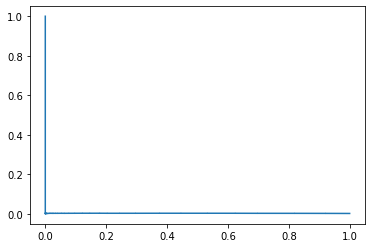

0.003173893373902736

In [48]:
evaluation(score, data_quanti["TOP_FRAUDE"], display=True)[0]

In [44]:
from pyod.models.lmdd import LMDD

In [49]:
model = LMDD()
model.fit(data_quanti.drop(columns=["TOP_FRAUDE", "TOP_FRAUDE_CARTE", "TOP_FRAUDE_VIREMENT"]).values)
score = model.decision_scores_

In [ ]:
evaluation(score, data_quanti["TOP_FRAUDE"], display=True)[0]

# Centrée reduit

In [ ]:
data_clean2 = pd.read_csv(PROJECT_PATH + "data\Donnees_v2.csv").drop(columns="Unnamed: 0")

bool_col = []
for i in data_clean2.columns:
    unique_value = np.unique(data_clean2[i])
    
    if len(unique_value) == 2:
        if 1 in unique_value and 0 in unique_value:
            bool_col.append(i)

y_col = ["TOP_FRAUDE", "TOP_FRAUDE_CARTE", "TOP_FRAUDE_VIREMENT"]

autre_col = list(set(data_clean2.columns) - set(bool_col + y_col + ["ID"]))

sub_df = data_clean2[autre_col]

data_clean2[autre_col] = ((sub_df - sub_df.mean()) / sub_df.std())

NameError: name 'np' is not defined